In [28]:
import pandas as pd
import numpy as np
from hmmlearn.hmm import GaussianHMM
from matplotlib import cm, pyplot as plt

In [3]:
price_data = pd.read_csv("price_data.csv", index_col=0)
return_data = price_data.pct_change()
return_data = return_data[1:]

In [4]:
display(price_data.head())
display(return_data.head())

,XLK,XLV,XLY,XLF,XLI,XLP,XLU,XLB,XLE,XLRE
2016-01-04,39.048382,64.160652,71.487450,16.964556,46.834759,42.746857,35.747070,38.155628,46.962601,24.997675
2016-01-05,38.946766,64.469086,71.394394,17.029881,46.960144,43.021263,36.003662,38.137783,47.141724,25.755156
2016-01-06,38.466396,63.942951,70.696457,16.768559,46.234772,42.875484,35.937443,37.137909,45.327084,25.506495
2016-01-07,37.330143,62.645741,69.244743,16.296715,44.981075,42.360985,35.697403,36.129112,44.221165,25.038710
2016-01-08,37.034534,61.702339,68.500267,16.042648,44.524364,42.035133,35.680866,35.763084,43.652634,24.710442


,XLK,XLV,XLY,XLF,XLI,XLP,XLU,XLB,XLE,XLRE
2016-01-05,-0.002602,0.004807,-0.001302,0.003851,0.002677,0.006419,0.007178,-0.000468,0.003814,0.030302
2016-01-06,-0.012334,-0.008161,-0.009776,-0.015345,-0.015447,-0.003389,-0.001839,-0.026217,-0.038493,-0.009655
2016-01-07,-0.029539,-0.020287,-0.020534,-0.028139,-0.027116,-0.012000,-0.006679,-0.027164,-0.024399,-0.018340
2016-01-08,-0.007919,-0.015059,-0.010751,-0.015590,-0.010153,-0.007692,-0.000463,-0.010131,-0.012857,-0.013110
2016-01-11,0.006485,-0.011908,0.007879,0.001357,0.000604,0.009384,0.005335,-0.016975,-0.021410,0.005978


In [30]:
xlk_rets = np.column_stack([return_data["XLK"]])
xlk_price = np.column_stack(price_data["XLK"])

hmm_model = GaussianHMM(
    n_components=3,                     # number of states
    covariance_type="full",             # full covariance matrix vs diagonal
    n_iter=1000                         # number of iterations
).fit(xlk_rets)

Model Score: 3254.2754934798136
Percentage of hidden state 1 = 1.130478
Transition matrix
[[0.17536478 0.78174059 0.04289463]
 [0.05693633 0.93931427 0.0037494 ]
 [0.03417869 0.01437404 0.95144726]]
Means and vars of each hidden state
0th hidden state
mean =  [-0.00201129]
var =  [0.00045046]
1th hidden state
mean =  [0.00167452]
var =  [6.41802376e-05]
2th hidden state
mean =  [-0.00243983]
var =  [0.00050281]


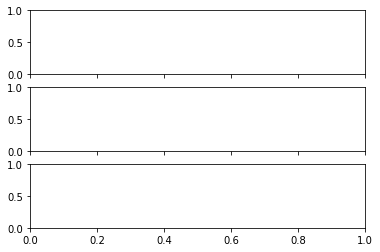

In [35]:
print("Model Score:", hmm_model.score(xlk_rets))

# Plot the in sample hidden states closing values
# Predict the hidden states array
hidden_states = hmm_model.predict(xlk_rets)

print('Percentage of hidden state 1 = %f' % (sum(hidden_states)/len(hidden_states)))

print("Transition matrix")
print(hmm_model.transmat_)

print("Means and vars of each hidden state")
for i in range(hmm_model.n_components):                   # 0 is down, 1 is up
    print("{0}th hidden state".format(i))
    print("mean = ", hmm_model.means_[i])
    print("var = ", np.diag(hmm_model.covars_[i]))

fig, axs = plt.subplots(hmm_model.n_components, sharex=True, sharey=True)
colours = cm.rainbow(np.linspace(0, 1, hmm_model.n_components))

for i, (ax, colour) in enumerate(zip(axs, colours)):
    # Use fancy indexing to plot data in each state.
    mask = hidden_states == i
    ax.plot_date(xlk_rets[mask], xlk_price[xlk_rets, mask], ".", linestyle='none', c=colour)
    ax.set_title("{0}th hidden state".format(i))

    # Format the ticks.
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())
    ax.grid(True)

plt.show()